In [1]:
from google.colab import drive
drive.mount('/content/gdrive/')
import sys
sys.path.append('/content/gdrive/My Drive/laboral/unipamplona/2020i/unidad1_Datos/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [0]:
import pandas as pd
from numpy import array, arange
from pylab import plot, show, grid, xticks, xlim, rcParams, legend

In [0]:
data = pd.read_csv('gdrive/My Drive/laboral/unipamplona/2020i/fisComp-ii/unidad1_Datos/data/Casos1_06abr2020.csv') # Leyendo datos desde el archivo Casos1.csv

In [4]:
data.head() # Muestra las primeras cinco líneas del archivo Casos1.csv

,ID de caso,Fecha de diagnóstico,Ciudad de ubicación,Departamento o Distrito,Atención**,Edad,Sexo,Tipo*,País de procedencia
0,1,06/03/2020,Bogotá,Bogotá D.C.,Recuperado,19,F,Importado,Italia
1,2,09/03/2020,Buga,Valle del Cauca,Recuperado,34,M,Importado,España
2,3,09/03/2020,Medellín,Antioquia,Recuperado,50,F,Importado,España
3,4,11/03/2020,Medellín,Antioquia,Recuperado,55,M,Relacionado,Colombia
4,5,11/03/2020,Medellín,Antioquia,Recuperado,25,M,Relacionado,Colombia


In [0]:
dataSex = pd.DataFrame(data, columns= ['Fecha de diagnóstico','Sexo','Edad', 'Atención**']) # Cargando en la variable dataSex los campos: Fecha diagnóstico, Sexo y Edad

In [0]:
histo = dataSex.groupby('Edad')['Sexo'].sum() # Suma el número de apariciones de M y F: Masculino, Femenino
histAten = dataSex.groupby('Edad')['Atención**'].sum()
#print(histo.str.count('F'), histo.str.count('M'))

In [7]:
male = histo.str.count('M')
female = histo.str.count('F')
total = male.sum()+female.sum()

print("hombres:",male.sum(), round((male.sum()/total)*100,2), "%")
print("Mujeres:",female.sum(), round((female.sum()/total)*100,2), "%")
print("Total:", total)

hombres: 804 50.92 %
Mujeres: 775 49.08 %
Total: 1579


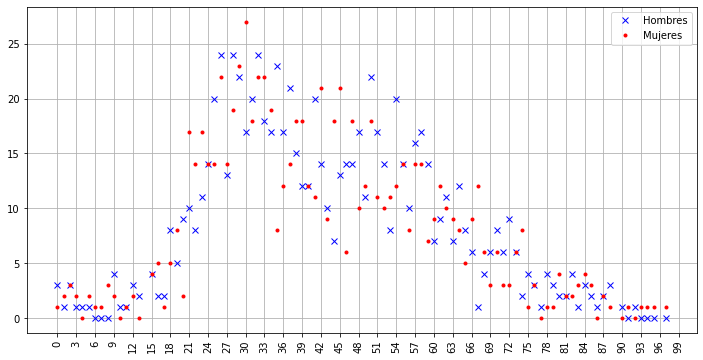

In [8]:
rcParams['figure.figsize'] = 12, 6

plot(histo.str.count('M'),'bx', label='Hombres')
plot(histo.str.count('F'),'r.', label='Mujeres')
xticks(arange(0, 100, step=3.), rotation=90)
grid()
#xlim(0,20)
legend()
show()

# From Pandas Frame to Numpy Array

In [9]:
hom = array( histo.str.count('M') )
muj = array( histo.str.count('F') )

print(hom[0], muj[0])

3 1


In [10]:
print(histAten)

Edad
0             CasaCasaCasaCasa
1             CasaHospitalCasa
2     CasaCasaCasaCasaCasaCasa
3            CasaCasaFallecido
4                         Casa
                ...           
92                        Casa
93                    Hospital
94                   Fallecido
95                    Hospital
97                    Hospital
Name: Atención**, Length: 95, dtype: object


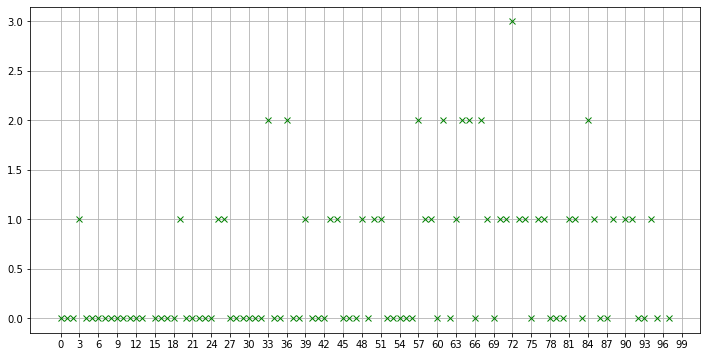

In [11]:
house = histAten.str.count('Casa')
recov = histAten.str.count('Recuperado')
death = histAten.str.count('Fallecido')

#plot(house, 'bo', label='Casa')
#plot(recov, 'ro', label='Recuperado')
plot(death, 'gx', label='Fallecido')
xticks( arange(0, 100, step=3.) )
grid()
show()